In [38]:
import nltk
import numpy as np
import pandas as pd
import re

In [280]:
df = pd.read_csv('LTD_rawevents.csv')
df.head(10)

,STATE,CITY,US REGION,US DISTRICT,AIRPORT CODE(S),AIRPORT DISTANCE (MI),MONTH,DATES,EVENT NAME,EVENT TYPE,...,CREDENTIALS SENT?,FOLLOW UP TO CREDENTIALS,TARGET DEMOGRAPHIC,EVENT COST,NEAREST AIRPORT,SECONDARY AIRPORT,MILES TO NEAREST AIRPORT,MILES TO SECOND AIRPORT,MASS TRANSIT AVAILABLE,EVENT URL JUN 7 2020
0,Illinois,Chicago,Midwest,East North Central,"MDW, ORD","13, 18",Oct,Early Oct,Bacon and Beer Classic,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.baconandbeerclassic.com/chicago-ti...
1,Illinois,Chicago,Midwest,East North Central,"MDW, ORD","13, 18",Apr,Late Apr,Cotopaxi Questival,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cotopaxi.com/products/questival-ch...
2,Illinois,Schaumburg,Midwest,East North Central,"ORD, MDW","18, 37",Jun,Early Jun,Gluten Free and Allergen Friendly Expo,Food Expo,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://gfafexpo.com/expos/chicago
3,Indiana,Indianapolis,Midwest,East North Central,IND,14,May,Mid/Late May,Bacon and Beer Classic,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.baconandbeerclassic.com/
4,Michigan,Kalamazoo,Midwest,East North Central,"AZO, GRR","6, 53",Aug,Late Aug,Bikes and Beers Kalamazoo,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://bikesandbeers.com/events/
5,Minnesota,Minneapolis,Midwest,West North Central,MSP,13,Apr,Mid Apr,Bacon and Beer Classic,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.baconandbeerclassic.com/
6,Minnesota,St. Paul,Midwest,West North Central,"MSP, STC","10, 72",Jul,Mid Jul,Bacon and Beer Classic,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.baconandbeerclassic.com/minneapoli...
7,Ohio,Cincinnati,Midwest,East North Central,"CVG, DAY","20, 61",Sep,Mid Sep,Bikes and Beers Cincinnati,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://bikesandbeers.com/events/
8,Ohio,Columbus,Midwest,East North Central,"CMH, DAY","8, 72",Sep,Late Sep,Bacon and Beer Classic,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.baconandbeerclassic.com/
9,Ohio,Columbus,Midwest,East North Central,"CMH, DAY","8, 72",Oct,Early Oct,Bikes and Beers Columbus,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://bikesandbeers.com/events/


In [263]:
events_df = df[['STATE', 'CITY', 'US REGION', 'MONTH', 'DATES', 'EVENT NAME', 'EVENT TYPE', 'WHAT TO DO?', 'EVENT DESC (1 SC)', 'GOOD 4 KIDS?', 'ADMISSION (FREE/FEE)', 'FEE DETAIL']]

In [264]:
events_df.sample(20)

,STATE,CITY,US REGION,MONTH,DATES,EVENT NAME,EVENT TYPE,WHAT TO DO?,EVENT DESC (1 SC),GOOD 4 KIDS?,ADMISSION (FREE/FEE),FEE DETAIL
1233,Idaho,Driggs,West,Jul,Early Jul,Teton Valley Balloon Rally,NaN,ACTIVE,Come watch hot air balloons inflate and fly aw...,YES,FREE/FEE,$0 event general. ($5 - $35 for parking). $300...
808,Tennessee,Nashville,South,Aug,Early Aug,Bikes and Beers Nashville,NaN,"ACTIVE, A&E",Featuring 15 and 30-mile rides departing from ...,NO,YES,$25 event general (spectator). $40-$50 registr...
282,New York,New York,Northeast,Year-round,Year-round,National Museum of the American Indian,Culture,"LEARN, A&E",NaN,NaN,NaN,NaN
961,Arizona,Phoenix,West,Jan,Late Jan,Phoenix New Times Tacolandia,Food & Drink Festival,TASTEBUDS,Tacolandia will feature unlimited taco samples...,NO,FEE,$25 event general (early bird Gen Admission + ...
802,Tennessee,Chattanooga,South,Jun,Early Jun,Bacon and Barrel Festival,Food/Beer/Wine,TASTEBUDS,We will bring together 15 of Chattanooga’s bes...,NO,FEE,$39 event general (general ad).
1592,Minnesota,St Paul,Midwest,May,Early May,Festival of Nations,NaN,"LEARN, A&E","For 86 years, the Festival of Nations has insp...",YES,FEE,$13.50 event general (early bird discount avai...
1160,California,Twain Harte,West,Jul,Late Jul,Twain Harte Summer Arts & Wine Festival,"Arts, Food/Beer/Wine","A&E, TASTEBUDS","Festival of quality arts, crafts, and performe...",NaN,FREE,NaN
1796,North Carolina,Wilmington,South,May,Early May,Cape Fear Comedy,Comedy Festival,A&E,NaN,NaN,NaN,NaN
1224,Colorado,Telluride,West,Jun/Jul,Late Jun/Late Jul,Telluride Yoga Festival,Sports/Active Lifestyle,ACTIVE,Inspirational 4-day event featuring over 100 o...,NaN,FEE,$285 3-day pass. $385 4-day pass.
1151,California,Sonoma County,West,Mar,Early Mar,Barrel Tasting Weekends,NaN,TASTEBUDS,It’s all about the WINE…many wineries offer “f...,NO,FEE,$60-$70 event general.


In [265]:
events_df['EVENT DESC (1 SC)'] = events_df['EVENT DESC (1 SC)'].fillna('')

In [266]:
events_df = events_df.drop([1350, 1696])

In [267]:
events_df['Desc_with_name'] = events_df[['EVENT NAME', 'EVENT DESC (1 SC)']].apply(lambda x: ' '.join(x), axis=1)
events_df.sample(10)

,STATE,CITY,US REGION,MONTH,DATES,EVENT NAME,EVENT TYPE,WHAT TO DO?,EVENT DESC (1 SC),GOOD 4 KIDS?,ADMISSION (FREE/FEE),FEE DETAIL,Desc_with_name
104,Connecticut,Sherman,Northeast,Jun,Late Jun,Rhubarb Festival,NaN,"TASTEBUDS, A&E","Food, Wine, Tours, Live Music!",YES,FREE,$0 event general (general admission).,"Rhubarb Festival Food, Wine, Tours, Live Music!"
1762,New York,New York,Northeast,Feb,Late Feb,African Pop-Up Festival NYC,NaN,"LEARN, A&E",Sample unique flavors from Africa and Jamaica ...,YES,FEE,$10 event general (admission + additional fee).,African Pop-Up Festival NYC Sample unique flav...
1423,Illinois,Utica,Midwest,Oct,Mid Oct,Burgoo Festival,NaN,A&E,The Burgoo Festival is an annual village stree...,YES,????,????,Burgoo Festival The Burgoo Festival is an annu...
1630,Nebraska,Norfolk,Midwest,Jun,Mid Jun,Great American Comedy Festival,Comedy Festival,A&E,Comedy Show,YES/NO,FEE,$XX event general (2018).,Great American Comedy Festival Comedy Show
1843,Texas,Houston,South,Sept,Early Sept,Houston Burlesque Festival,Arts Festival (Burlesque),A&E,The Houston Burlesque Festival began as a visi...,NO,FEE,$25-$100 event general (general ad).,Houston Burlesque Festival The Houston Burlesq...
1159,California,Tahoe City,West,Feb/Mar,Late Feb - Mid Mar,North Lake Tahoe SnowFest,NaN,"ACTIVE, A&E","For more than 30 years, the resorts on the nor...",YES,FEE,$XX event general (range of prices to attend i...,North Lake Tahoe SnowFest For more than 30 yea...
1717,Louisiana,Shreveport,South,Oct,Late Oct,American Kitefliers Association Annual Convention,NaN,ACTIVE,Easy access to all indoor activities; i.e. Wor...,YES,NaN,NaN,American Kitefliers Association Annual Convent...
1765,New York,New York,Northeast,Jun,Early Jun,BookCon,"Arts, Cultural Festival","LEARN, A&E",The event where storytelling and pop culture c...,YES,FEE,$30-$45 event general (day pass + is cheaper i...,BookCon The event where storytelling and pop c...
427,Vermont,Tunbridge,Northeast,Jun,Late Jun,Jenny Brook Bluegrass Festival,Music,A&E,Drop by for a day or bring your camper to put ...,YES,FEE,$90-$150 event general (general ad depends on ...,Jenny Brook Bluegrass Festival Drop by for a d...
650,Kentucky,Lexington,South,Apr/May,Mid Apr/Early May,Kentucky Derby Festival,Community Festival,A&E,Our Festival blasts off each April with our Op...,YES,FEE,$20-$150 event general (range of prices to att...,Kentucky Derby Festival Our Festival blasts of...


In [27]:
events_df.head()

,STATE,CITY,US REGION,MONTH,DATES,EVENT NAME,EVENT TYPE,WHAT TO DO?,EVENT DESC (1 SC),ADMISSION (FREE/FEE),FEE DETAIL,Desc_with_name
0,Illinois,Chicago,Midwest,Oct,Early Oct,Bacon and Beer Classic,NaN,"TASTEBUDS, A&E",Prepare yourself for 100+ draft beers from reg...,FEE,Tickets coming soon!,Bacon and Beer Classic Prepare yourself for 10...
1,Illinois,Chicago,Midwest,Apr,Late Apr,Cotopaxi Questival,NaN,ACTIVE,The Cotopaxi Questival is a 24-hour adventure ...,FEE,NOT IN 2019,Cotopaxi Questival The Cotopaxi Questival is a...
2,Illinois,Schaumburg,Midwest,Jun,Early Jun,Gluten Free and Allergen Friendly Expo,Food Expo,"TASTEBUDS, LEARN",Premier gluten and allergen-free consumer show...,FEE,$15 Adult Day Pass. $25 Adult Weekend Pass (ba...,Gluten Free and Allergen Friendly Expo Premier...
3,Indiana,Indianapolis,Midwest,May,Mid/Late May,Bacon and Beer Classic,NaN,"TASTEBUDS, A&E",We bring together the best local breweries and...,FEE,Not in 2019.,Bacon and Beer Classic We bring together the b...
4,Michigan,Kalamazoo,Midwest,Aug,Late Aug,Bikes and Beers Kalamazoo,NaN,"ACTIVE, A&E",Featuring 15 and 30-mile rides departing from ...,YES,$25 event general (spectator). $40-$50 registr...,Bikes and Beers Kalamazoo Featuring 15 and 30-...


In [268]:
events_df['Desc_with_name'] = events_df['Desc_with_name'].str.lower()


In [269]:
events_df['Desc_with_name'] = events_df['Desc_with_name'].apply(lambda x: re.sub('[^\w\s]', '', x))

In [270]:
events_df.sample(15)

,STATE,CITY,US REGION,MONTH,DATES,EVENT NAME,EVENT TYPE,WHAT TO DO?,EVENT DESC (1 SC),GOOD 4 KIDS?,ADMISSION (FREE/FEE),FEE DETAIL,Desc_with_name
996,Arizona,Wickenburg,West,Feb,Mid Feb,Reebok Ragnar Del Sol,NaN,ACTIVE,This overnight running relay begins in the in ...,NaN,FEE,$50 - $173.33 event general (per runner + diff...,reebok ragnar del sol this overnight running r...
1245,Montana,Butte,West,Aug,Early/Mid Aug,An Ri Ra Montana Irish Festival,NaN,"LEARN, ACTIVE, A&E","FREE Admission. Irish language, music, culture...",YES,FREE,$0 event general.,an ri ra montana irish festival free admission...
1853,Vermont,Burlington,Northeast,Jan,Mid Jan,Vermont Burlesque Festival,Arts Festival (Burlesque),A&E,The Vermont Burlesque Festival celebrates the ...,NO,FEE,$30-$40 event general (general ad).,vermont burlesque festival the vermont burlesq...
962,Arizona,Phoenix,West,Mar,Early Mar,Plein Air Painting Festival,NaN,A&E,Register for a free youth workshop offering a ...,YES,FREE,$0 event general.,plein air painting festival register for a fre...
1829,Rhode Island,Block Island,Northeast,Jun,Late Jun,Block Island Race Week,Sports/Active Lifestyle,A&E,Block Island Race Week is focused on offshore ...,YES,NaN,NaN,block island race week block island race week ...
1649,Ohio,Avon,Midwest,June,Mid Jun,Avon Heritage Duck Tape Festival,Festival,A&E,,NaN,NaN,NaN,avon heritage duck tape festival
1565,Minnesota,Nevis,Midwest,Jul,End Jul,Muskie Days Music Festival,NaN,"A&E, ACTIVE",This annual celebration of the big lunker that...,YES,FEE,$5 event general (wristbands not sure if that ...,muskie days music festival this annual celebra...
153,Massachusetts,Carver,Northeast,Sept/Oct,Early Sept/Late Oct,King Richard's Faire,Renaissance Festival,A&E,"Entertainment, exciting rides and challenging ...",YES,FEE,$32 event general ( + extra fee + $16 + fee fo...,king richards faire entertainment exciting rid...
1295,Oregon,Portland,West,Sept,Late Sept,The Bloody Mary Festival,Cocktail Festival,TASTEBUDS,A celebration of the most beloved brunch cockt...,NO,FEE,$45 event general (General Admission). $55 eve...,the bloody mary festival a celebration of the ...
303,New York,Phelps,Northeast,Jul/Aug,Late Jul/Early Aug,Phelps Sauerkraut Weekend,Food Festival,"TASTEBUDS, A&E",,NaN,NaN,NaN,phelps sauerkraut weekend


In [271]:
import nltk

# Uncomment the following line the first time you run the code
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
stop = stopwords.words('english') + ["festival", "festivals", "event", "events", "festiv", "day", "days", "week", "weeks", "month", "months",\
                                    "year", "years", "much", \
                                    "feature", "celebration", "celebrate", "celebrating", "features","featuring", "featurin", "include", \
                                    "weekend", "event", "featuring", "enjoy", "fest", "cotopaxi", "questival", \
                                    "around", "best", "include", "includes","including", "great", "first", "come", "throughout", "area"]
print(stop)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alisonrishty/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/alisonrishty/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below

In [272]:
events_df['Desc_with_name'] = events_df['Desc_with_name'].apply(lambda text: " ".join(word for word in text.split() if word not in stop))

In [279]:
events_df.head(10)

,STATE,CITY,US REGION,MONTH,DATES,EVENT NAME,EVENT TYPE,WHAT TO DO?,EVENT DESC (1 SC),GOOD 4 KIDS?,ADMISSION (FREE/FEE),FEE DETAIL,Desc_with_name,Desc_words,Stemmed_words
0,Illinois,Chicago,Midwest,Oct,Early Oct,Bacon and Beer Classic,NaN,"TASTEBUDS, A&E",Prepare yourself for 100+ draft beers from reg...,NO,FEE,Tickets coming soon!,bacon beer classic prepare 100 draft beers reg...,"[bacon, beer, classic, prepare, 100, draft, be...","[bacon, beer, classic, prepar, 100, draft, bee..."
1,Illinois,Chicago,Midwest,Apr,Late Apr,Cotopaxi Questival,NaN,ACTIVE,The Cotopaxi Questival is a 24-hour adventure ...,YES,FEE,NOT IN 2019,24hour adventure race teams 26 friends explore...,"[24hour, adventure, race, teams, 26, friends, ...","[24hour, adventur, race, team, 26, friend, exp..."
2,Illinois,Schaumburg,Midwest,Jun,Early Jun,Gluten Free and Allergen Friendly Expo,Food Expo,"TASTEBUDS, LEARN",Premier gluten and allergen-free consumer show...,YES,FEE,$15 Adult Day Pass. $25 Adult Weekend Pass (ba...,gluten free allergen friendly expo premier glu...,"[gluten, free, allergen, friendly, expo, premi...","[gluten, free, allergen, friendli, expo, premi..."
3,Indiana,Indianapolis,Midwest,May,Mid/Late May,Bacon and Beer Classic,NaN,"TASTEBUDS, A&E",We bring together the best local breweries and...,NO,FEE,Not in 2019.,bacon beer classic bring together local brewer...,"[bacon, beer, classic, bring, together, local,...","[bacon, beer, classic, bring, togeth, local, b..."
4,Michigan,Kalamazoo,Midwest,Aug,Late Aug,Bikes and Beers Kalamazoo,NaN,"ACTIVE, A&E",Featuring 15 and 30-mile rides departing from ...,NO,YES,$25 event general (spectator). $40-$50 registr...,bikes beers kalamazoo 15 30mile rides departin...,"[bikes, beers, kalamazoo, 15, 30mile, rides, d...","[bike, beer, kalamazoo, 15, 30mile, ride, depa..."
5,Minnesota,Minneapolis,Midwest,Apr,Mid Apr,Bacon and Beer Classic,NaN,"TASTEBUDS, A&E",We bring together the best local breweries and...,NO,FEE,Not in 2019.,bacon beer classic bring together local brewer...,"[bacon, beer, classic, bring, together, local,...","[bacon, beer, classic, bring, togeth, local, b..."
6,Minnesota,St. Paul,Midwest,Jul,Mid Jul,Bacon and Beer Classic,NaN,"TASTEBUDS, A&E",Prepare yourself for 100+ draft beers from reg...,NO,FEE,Tickets coming soon!,bacon beer classic prepare 100 draft beers reg...,"[bacon, beer, classic, prepare, 100, draft, be...","[bacon, beer, classic, prepar, 100, draft, bee..."
7,Ohio,Cincinnati,Midwest,Sep,Mid Sep,Bikes and Beers Cincinnati,NaN,"ACTIVE, A&E",Featuring 15 and 30 mile rides departing from ...,NO,YES,$25 event general (spectator). $40-$50 registr...,bikes beers cincinnati 15 30 mile rides depart...,"[bikes, beers, cincinnati, 15, 30, mile, rides...","[bike, beer, cincinnati, 15, 30, mile, ride, d..."
8,Ohio,Columbus,Midwest,Sep,Late Sep,Bacon and Beer Classic,NaN,"TASTEBUDS, A&E",We bring together the best local breweries and...,NO,FEE,Not in 2019.,bacon beer classic bring together local brewer...,"[bacon, beer, classic, bring, together, local,...","[bacon, beer, classic, bring, togeth, local, b..."
9,Ohio,Columbus,Midwest,Oct,Early Oct,Bikes and Beers Columbus,NaN,"ACTIVE, A&E",Featuring 15 and 30-mile rides departing from ...,NO,YES,$25 event general (spectator). $40-$50 registr...,bikes beers columbus 15 30mile rides departing...,"[bikes, beers, columbus, 15, 30mile, rides, de...","[bike, beer, columbu, 15, 30mile, ride, depart..."


In [274]:
from textblob import TextBlob


#events_df['Desc_with_name'] = TextBlob(events_df['Desc_with_name']).words
TextBlob(events_df['Desc_with_name'].iloc[0]).words
#TextBlob(sample_text).words

WordList(['bacon', 'beer', 'classic', 'prepare', '100', 'draft', 'beers', 'regional', 'breweries', '30', 'creative', 'bacon', 'dishes', 'local', 'chefs', 'hormel', 'bacon', 'eating', 'contest', 'lawn', 'games', 'music', 'much', 'rally', 'foodie', 'friends', 'get', 'ready', 'experience', 'bacon', 'beer', 'like', 'never'])

In [275]:
events_df['Desc_words'] = events_df['Desc_with_name'].apply(lambda event: TextBlob(event).words)

In [276]:
events_df.Desc_words[0][2]

'classic'

In [57]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

In [277]:
#stemmed_text = ' '.join([stemmer.stem(word) for word in nonprocess_text.split()])
#print(stemmed_text)

events_df['Stemmed_words'] = events_df['Desc_words'].apply(lambda x: [stemmer.stem(word) for word in x] )
#da.rev.apply(lambda x: [ps.stem(word) for word in x])
#events_df['Stemmed_words'] = ' '.join([stemmer.stem(word) for word in nonprocess_text.split()])

In [281]:
events_df

,STATE,CITY,US REGION,MONTH,DATES,EVENT NAME,EVENT TYPE,WHAT TO DO?,EVENT DESC (1 SC),GOOD 4 KIDS?,ADMISSION (FREE/FEE),FEE DETAIL,Desc_with_name,Desc_words,Stemmed_words
0,Illinois,Chicago,Midwest,Oct,Early Oct,Bacon and Beer Classic,NaN,"TASTEBUDS, A&E",Prepare yourself for 100+ draft beers from reg...,NO,FEE,Tickets coming soon!,bacon beer classic prepare 100 draft beers reg...,"[bacon, beer, classic, prepare, 100, draft, be...","[bacon, beer, classic, prepar, 100, draft, bee..."
1,Illinois,Chicago,Midwest,Apr,Late Apr,Cotopaxi Questival,NaN,ACTIVE,The Cotopaxi Questival is a 24-hour adventure ...,YES,FEE,NOT IN 2019,24hour adventure race teams 26 friends explore...,"[24hour, adventure, race, teams, 26, friends, ...","[24hour, adventur, race, team, 26, friend, exp..."
2,Illinois,Schaumburg,Midwest,Jun,Early Jun,Gluten Free and Allergen Friendly Expo,Food Expo,"TASTEBUDS, LEARN",Premier gluten and allergen-free consumer show...,YES,FEE,$15 Adult Day Pass. $25 Adult Weekend Pass (ba...,gluten free allergen friendly expo premier glu...,"[gluten, free, allergen, friendly, expo, premi...","[gluten, free, allergen, friendli, expo, premi..."
3,Indiana,Indianapolis,Midwest,May,Mid/Late May,Bacon and Beer Classic,NaN,"TASTEBUDS, A&E",We bring together the best local breweries and...,NO,FEE,Not in 2019.,bacon beer classic bring together local brewer...,"[bacon, beer, classic, bring, together, local,...","[bacon, beer, classic, bring, togeth, local, b..."
4,Michigan,Kalamazoo,Midwest,Aug,Late Aug,Bikes and Beers Kalamazoo,NaN,"ACTIVE, A&E",Featuring 15 and 30-mile rides departing from ...,NO,YES,$25 event general (spectator). $40-$50 registr...,bikes beers kalamazoo 15 30mile rides departin...,"[bikes, beers, kalamazoo, 15, 30mile, rides, d...","[bike, beer, kalamazoo, 15, 30mile, ride, depa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1926,Arkansas,Little Rock,South,Mar,Mid Mar,The Fulcrum Festival,Music Festival,A&E,,NaN,NaN,NaN,fulcrum,[fulcrum],[fulcrum]
1927,Florida,Coral Gables,South,Nov - Jan,Late Nov - Early Jan,The NightGarden – A Magical Light Spectacular,NaN,A&E,Journey inside Miami's most gorgeous garden at...,YES,FEE,$28 event general (general admission + discoun...,nightgarden magical light spectacular journey ...,"[nightgarden, magical, light, spectacular, jou...","[nightgarden, magic, light, spectacular, journ..."
1928,Florida,Fort Lauderdale,South,Jan,Mid Jan,The Yoga Expo Florida,NaN,ACTIVE,This 2-day event brings together the local yog...,YES,FEE,$35 event general (all day admission + early b...,yoga expo florida 2day brings together local y...,"[yoga, expo, florida, 2day, brings, together, ...","[yoga, expo, florida, 2day, bring, togeth, loc..."
1929,Florida,West Palm Beach,South,Feb,Early Feb,Urban Yoga Fest and the Bohemian Collective,NaN,ACTIVE,An inspiring three day festival of like-minded...,YES,FEE,$20-$25 event general. $60 event premium (3 da...,urban yoga bohemian collective inspiring three...,"[urban, yoga, bohemian, collective, inspiring,...","[urban, yoga, bohemian, collect, inspir, three..."


In [282]:
from nltk import WordNetLemmatizer

lemztr = WordNetLemmatizer()
events_df['Lem_words'] = events_df['Desc_words'].apply(lambda x: [lemztr.lemmatize(word) for word in x] )

In [283]:
events_df

,STATE,CITY,US REGION,MONTH,DATES,EVENT NAME,EVENT TYPE,WHAT TO DO?,EVENT DESC (1 SC),GOOD 4 KIDS?,ADMISSION (FREE/FEE),FEE DETAIL,Desc_with_name,Desc_words,Stemmed_words,Lem_words
0,Illinois,Chicago,Midwest,Oct,Early Oct,Bacon and Beer Classic,NaN,"TASTEBUDS, A&E",Prepare yourself for 100+ draft beers from reg...,NO,FEE,Tickets coming soon!,bacon beer classic prepare 100 draft beers reg...,"[bacon, beer, classic, prepare, 100, draft, be...","[bacon, beer, classic, prepar, 100, draft, bee...","[bacon, beer, classic, prepare, 100, draft, be..."
1,Illinois,Chicago,Midwest,Apr,Late Apr,Cotopaxi Questival,NaN,ACTIVE,The Cotopaxi Questival is a 24-hour adventure ...,YES,FEE,NOT IN 2019,24hour adventure race teams 26 friends explore...,"[24hour, adventure, race, teams, 26, friends, ...","[24hour, adventur, race, team, 26, friend, exp...","[24hour, adventure, race, team, 26, friend, ex..."
2,Illinois,Schaumburg,Midwest,Jun,Early Jun,Gluten Free and Allergen Friendly Expo,Food Expo,"TASTEBUDS, LEARN",Premier gluten and allergen-free consumer show...,YES,FEE,$15 Adult Day Pass. $25 Adult Weekend Pass (ba...,gluten free allergen friendly expo premier glu...,"[gluten, free, allergen, friendly, expo, premi...","[gluten, free, allergen, friendli, expo, premi...","[gluten, free, allergen, friendly, expo, premi..."
3,Indiana,Indianapolis,Midwest,May,Mid/Late May,Bacon and Beer Classic,NaN,"TASTEBUDS, A&E",We bring together the best local breweries and...,NO,FEE,Not in 2019.,bacon beer classic bring together local brewer...,"[bacon, beer, classic, bring, together, local,...","[bacon, beer, classic, bring, togeth, local, b...","[bacon, beer, classic, bring, together, local,..."
4,Michigan,Kalamazoo,Midwest,Aug,Late Aug,Bikes and Beers Kalamazoo,NaN,"ACTIVE, A&E",Featuring 15 and 30-mile rides departing from ...,NO,YES,$25 event general (spectator). $40-$50 registr...,bikes beers kalamazoo 15 30mile rides departin...,"[bikes, beers, kalamazoo, 15, 30mile, rides, d...","[bike, beer, kalamazoo, 15, 30mile, ride, depa...","[bike, beer, kalamazoo, 15, 30mile, ride, depa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1926,Arkansas,Little Rock,South,Mar,Mid Mar,The Fulcrum Festival,Music Festival,A&E,,NaN,NaN,NaN,fulcrum,[fulcrum],[fulcrum],[fulcrum]
1927,Florida,Coral Gables,South,Nov - Jan,Late Nov - Early Jan,The NightGarden – A Magical Light Spectacular,NaN,A&E,Journey inside Miami's most gorgeous garden at...,YES,FEE,$28 event general (general admission + discoun...,nightgarden magical light spectacular journey ...,"[nightgarden, magical, light, spectacular, jou...","[nightgarden, magic, light, spectacular, journ...","[nightgarden, magical, light, spectacular, jou..."
1928,Florida,Fort Lauderdale,South,Jan,Mid Jan,The Yoga Expo Florida,NaN,ACTIVE,This 2-day event brings together the local yog...,YES,FEE,$35 event general (all day admission + early b...,yoga expo florida 2day brings together local y...,"[yoga, expo, florida, 2day, brings, together, ...","[yoga, expo, florida, 2day, bring, togeth, loc...","[yoga, expo, florida, 2day, brings, together, ..."
1929,Florida,West Palm Beach,South,Feb,Early Feb,Urban Yoga Fest and the Bohemian Collective,NaN,ACTIVE,An inspiring three day festival of like-minded...,YES,FEE,$20-$25 event general. $60 event premium (3 da...,urban yoga bohemian collective inspiring three...,"[urban, yoga, bohemian, collective, inspiring,...","[urban, yoga, bohemian, collect, inspir, three...","[urban, yoga, bohemian, collective, inspiring,..."


In [284]:
events_df['Lem_words'] = events_df['Lem_words'].apply(lambda x: ' '.join(x))

In [285]:
from wordcloud import WordCloud

wc = WordCloud(background_color="white", max_words=2000, width=800, height=400)
# generate word cloud
wc.generate(' '.join(events_df['Lem_words']))

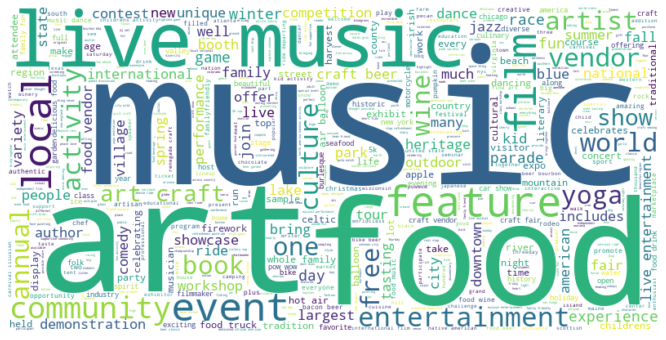

In [286]:
import matplotlib.pyplot as plt
%matplotlib inline

# show
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [287]:
from sklearn.feature_extraction.text import CountVectorizer

In [288]:
count_vec = CountVectorizer()
X_train_count = count_vec.fit_transform(events_df['Lem_words'])
X_train_count.shape

(1929, 6674)

In [289]:
print(len(count_vec.get_feature_names()))

6674


In [290]:
print(count_vec.get_feature_names()[::100])

['10', '2400', '716', 'advanced', 'alone', 'area', 'augusta', 'basic', 'bibliophile', 'bonnaroo', 'broadmoor', 'canam', 'centralia', 'christkindlesmarkt', 'collectible', 'conscious', 'couple', 'cuervo', 'decorative', 'dissolve', 'earning', 'encouragement', 'everday', 'familyfriendly', 'filling', 'fondos', 'fruit', 'ghostly', 'greet', 'harry', 'hippieness', 'hunting', 'inflated', 'italianamerican', 'kaskade', 'lantern', 'lime', 'luncheon', 'martial', 'metro', 'moonwalk', 'nationwide', 'norway', 'ongoing', 'packaging', 'peeling', 'plain', 'powder', 'protecting', 'rancheria', 'rendezvous', 'riverbend', 'safari', 'screen', 'shawangunk', 'situated', 'softball', 'squash', 'strives', 'system', 'testy', 'tony', 'trying', 'us', 'wakarusa', 'whoopie', 'worthy']


In [291]:
count_vec2 = CountVectorizer(ngram_range=(1,2))
X_train_count2 = count_vec2.fit_transform(events_df['Lem_words']) #fit and transform
X_train_count2.shape

(1929, 35875)

In [292]:
print(count_vec2.get_feature_names()[::1000])

['10', 'across', 'andssince', 'attracting', 'beer 60', 'bowl mulligan', 'celebrated parade', 'class world', 'contest firework', 'culinary evolution', 'designer festive', 'educational interactive', 'exciting care', 'feature exciting', 'followed allsamplesincluded', 'game syrup', 'halloween central', 'hospital ozark', 'international wine', 'lake pend', 'locallydesigned', 'meet fitness', 'music join', 'obstacle course', 'parade billed', 'placemaking oro', 'provide soundtrack', 'research science', 'sample wine', 'shopper paradise', 'south fight', 'suburb includes', 'thing mystical', 'trust', 'visit tinsmith', 'winter sport']


In [293]:
count_vec3 = CountVectorizer(ngram_range=(1,2), min_df=7, max_df=.9, max_features=5000)
X_train_count3 = count_vec3.fit_transform(events_df['Lem_words'])
X_train_count3.shape

(1929, 1541)

In [294]:
print(count_vec3.get_feature_names()[::50])

['10', 'addition', 'art show', 'battle', 'bluff county', 'car', 'city wild', 'country dont', 'dazzling', 'draft beer', 'exhibition', 'find', 'four day', 'goal', 'highlight', 'includes', 'kite', 'living', 'master', 'music performance', 'organic', 'philadelphia', 'program', 'resident', 'sculpting', 'site', 'stage experience', 'team', 'travel expert', 'vibrant', 'wine food']


In [109]:
from sklearn.naive_bayes import MultinomialNB

In [295]:
#newsgroups_train.target_names
#events_df["Alex_targets"] = events_df['WHAT TO DO?']
events_df = events_df.rename({'WHAT TO DO?' : 'Alex_targets'}, axis='columns')

In [296]:
events_df.Alex_targets.unique()

array(['TASTEBUDS, A&E', 'ACTIVE', 'TASTEBUDS, LEARN', 'ACTIVE, A&E',
       'LEARN, A&E', 'A&E', 'TASTEBUDS', 'TASTEBUDS, ACTIVE, A&E',
       'ACTIVE, LEARN', 'A&E, TASTEBUDS', 'TASTEBUDS, A&E, ACTIVE',
       'LEARN', 'A&E, LEARN', 'A&E, ACTIVE', 'LEARN, ACTIVE, A&E',
       'ACTIVE, A&E, TASTEBUDS', 'LEARN, A&E, ACTIVE', 'LEARN, TASTEBUDS',
       'A&E, ACTIVE, LEARN', 'ACTIVE, TASTEBUDS, A&E',
       'LEARN, TASTEBUDS, A&E', 'TASTEBUDS, LEARN, A&E', nan,
       'LEARN, ACTIVE A&E', 'ACTIVE, TASTEBUDS', 'ACTIVE, LEARN, A&E',
       'TASTEBUDS, A&E, LEARN', 'ACTIVE, A&E, LEARN',
       'LEARN, A&E, TASTEBUDS', 'A&E, ACTIVE, TASTEBUDS',
       'A&E, LEARN, ACTIVE', 'LEARN, ACTIVE', 'A&E, TASTEBUDS, ACTIVE',
       'TASTEBUDS, ACTIVE, A&E, LEARN', 'TASTEBUDS, A&E, ACTIVE, LEARN'],
      dtype=object)

In [297]:
sum(events_df.Alex_targets.isna())

6

In [298]:
events_df_lab = events_df.dropna(subset=['Alex_targets'])

In [299]:
events_df_lab

,STATE,CITY,US REGION,MONTH,DATES,EVENT NAME,EVENT TYPE,Alex_targets,EVENT DESC (1 SC),GOOD 4 KIDS?,ADMISSION (FREE/FEE),FEE DETAIL,Desc_with_name,Desc_words,Stemmed_words,Lem_words
0,Illinois,Chicago,Midwest,Oct,Early Oct,Bacon and Beer Classic,NaN,"TASTEBUDS, A&E",Prepare yourself for 100+ draft beers from reg...,NO,FEE,Tickets coming soon!,bacon beer classic prepare 100 draft beers reg...,"[bacon, beer, classic, prepare, 100, draft, be...","[bacon, beer, classic, prepar, 100, draft, bee...",bacon beer classic prepare 100 draft beer regi...
1,Illinois,Chicago,Midwest,Apr,Late Apr,Cotopaxi Questival,NaN,ACTIVE,The Cotopaxi Questival is a 24-hour adventure ...,YES,FEE,NOT IN 2019,24hour adventure race teams 26 friends explore...,"[24hour, adventure, race, teams, 26, friends, ...","[24hour, adventur, race, team, 26, friend, exp...",24hour adventure race team 26 friend explore u...
2,Illinois,Schaumburg,Midwest,Jun,Early Jun,Gluten Free and Allergen Friendly Expo,Food Expo,"TASTEBUDS, LEARN",Premier gluten and allergen-free consumer show...,YES,FEE,$15 Adult Day Pass. $25 Adult Weekend Pass (ba...,gluten free allergen friendly expo premier glu...,"[gluten, free, allergen, friendly, expo, premi...","[gluten, free, allergen, friendli, expo, premi...",gluten free allergen friendly expo premier glu...
3,Indiana,Indianapolis,Midwest,May,Mid/Late May,Bacon and Beer Classic,NaN,"TASTEBUDS, A&E",We bring together the best local breweries and...,NO,FEE,Not in 2019.,bacon beer classic bring together local brewer...,"[bacon, beer, classic, bring, together, local,...","[bacon, beer, classic, bring, togeth, local, b...",bacon beer classic bring together local brewer...
4,Michigan,Kalamazoo,Midwest,Aug,Late Aug,Bikes and Beers Kalamazoo,NaN,"ACTIVE, A&E",Featuring 15 and 30-mile rides departing from ...,NO,YES,$25 event general (spectator). $40-$50 registr...,bikes beers kalamazoo 15 30mile rides departin...,"[bikes, beers, kalamazoo, 15, 30mile, rides, d...","[bike, beer, kalamazoo, 15, 30mile, ride, depa...",bike beer kalamazoo 15 30mile ride departing b...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1926,Arkansas,Little Rock,South,Mar,Mid Mar,The Fulcrum Festival,Music Festival,A&E,,NaN,NaN,NaN,fulcrum,[fulcrum],[fulcrum],fulcrum
1927,Florida,Coral Gables,South,Nov - Jan,Late Nov - Early Jan,The NightGarden – A Magical Light Spectacular,NaN,A&E,Journey inside Miami's most gorgeous garden at...,YES,FEE,$28 event general (general admission + discoun...,nightgarden magical light spectacular journey ...,"[nightgarden, magical, light, spectacular, jou...","[nightgarden, magic, light, spectacular, journ...",nightgarden magical light spectacular journey ...
1928,Florida,Fort Lauderdale,South,Jan,Mid Jan,The Yoga Expo Florida,NaN,ACTIVE,This 2-day event brings together the local yog...,YES,FEE,$35 event general (all day admission + early b...,yoga expo florida 2day brings together local y...,"[yoga, expo, florida, 2day, brings, together, ...","[yoga, expo, florida, 2day, bring, togeth, loc...",yoga expo florida 2day brings together local y...
1929,Florida,West Palm Beach,South,Feb,Early Feb,Urban Yoga Fest and the Bohemian Collective,NaN,ACTIVE,An inspiring three day festival of like-minded...,YES,FEE,$20-$25 event general. $60 event premium (3 da...,urban yoga bohemian collective inspiring three...,"[urban, yoga, bohemian, collective, inspiring,...","[urban, yoga, bohemian, collect, inspir, three...",urban yoga bohemian collective inspiring three...


In [300]:
events_df_lab.Alex_targets = events_df_lab.Alex_targets.apply(lambda x: x.split(',')[0])

In [301]:
events_df_lab

,STATE,CITY,US REGION,MONTH,DATES,EVENT NAME,EVENT TYPE,Alex_targets,EVENT DESC (1 SC),GOOD 4 KIDS?,ADMISSION (FREE/FEE),FEE DETAIL,Desc_with_name,Desc_words,Stemmed_words,Lem_words
0,Illinois,Chicago,Midwest,Oct,Early Oct,Bacon and Beer Classic,NaN,TASTEBUDS,Prepare yourself for 100+ draft beers from reg...,NO,FEE,Tickets coming soon!,bacon beer classic prepare 100 draft beers reg...,"[bacon, beer, classic, prepare, 100, draft, be...","[bacon, beer, classic, prepar, 100, draft, bee...",bacon beer classic prepare 100 draft beer regi...
1,Illinois,Chicago,Midwest,Apr,Late Apr,Cotopaxi Questival,NaN,ACTIVE,The Cotopaxi Questival is a 24-hour adventure ...,YES,FEE,NOT IN 2019,24hour adventure race teams 26 friends explore...,"[24hour, adventure, race, teams, 26, friends, ...","[24hour, adventur, race, team, 26, friend, exp...",24hour adventure race team 26 friend explore u...
2,Illinois,Schaumburg,Midwest,Jun,Early Jun,Gluten Free and Allergen Friendly Expo,Food Expo,TASTEBUDS,Premier gluten and allergen-free consumer show...,YES,FEE,$15 Adult Day Pass. $25 Adult Weekend Pass (ba...,gluten free allergen friendly expo premier glu...,"[gluten, free, allergen, friendly, expo, premi...","[gluten, free, allergen, friendli, expo, premi...",gluten free allergen friendly expo premier glu...
3,Indiana,Indianapolis,Midwest,May,Mid/Late May,Bacon and Beer Classic,NaN,TASTEBUDS,We bring together the best local breweries and...,NO,FEE,Not in 2019.,bacon beer classic bring together local brewer...,"[bacon, beer, classic, bring, together, local,...","[bacon, beer, classic, bring, togeth, local, b...",bacon beer classic bring together local brewer...
4,Michigan,Kalamazoo,Midwest,Aug,Late Aug,Bikes and Beers Kalamazoo,NaN,ACTIVE,Featuring 15 and 30-mile rides departing from ...,NO,YES,$25 event general (spectator). $40-$50 registr...,bikes beers kalamazoo 15 30mile rides departin...,"[bikes, beers, kalamazoo, 15, 30mile, rides, d...","[bike, beer, kalamazoo, 15, 30mile, ride, depa...",bike beer kalamazoo 15 30mile ride departing b...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1926,Arkansas,Little Rock,South,Mar,Mid Mar,The Fulcrum Festival,Music Festival,A&E,,NaN,NaN,NaN,fulcrum,[fulcrum],[fulcrum],fulcrum
1927,Florida,Coral Gables,South,Nov - Jan,Late Nov - Early Jan,The NightGarden – A Magical Light Spectacular,NaN,A&E,Journey inside Miami's most gorgeous garden at...,YES,FEE,$28 event general (general admission + discoun...,nightgarden magical light spectacular journey ...,"[nightgarden, magical, light, spectacular, jou...","[nightgarden, magic, light, spectacular, journ...",nightgarden magical light spectacular journey ...
1928,Florida,Fort Lauderdale,South,Jan,Mid Jan,The Yoga Expo Florida,NaN,ACTIVE,This 2-day event brings together the local yog...,YES,FEE,$35 event general (all day admission + early b...,yoga expo florida 2day brings together local y...,"[yoga, expo, florida, 2day, brings, together, ...","[yoga, expo, florida, 2day, bring, togeth, loc...",yoga expo florida 2day brings together local y...
1929,Florida,West Palm Beach,South,Feb,Early Feb,Urban Yoga Fest and the Bohemian Collective,NaN,ACTIVE,An inspiring three day festival of like-minded...,YES,FEE,$20-$25 event general. $60 event premium (3 da...,urban yoga bohemian collective inspiring three...,"[urban, yoga, bohemian, collective, inspiring,...","[urban, yoga, bohemian, collect, inspir, three...",urban yoga bohemian collective inspiring three...


In [302]:
events_df_lab.Alex_targets.unique()

array(['TASTEBUDS', 'ACTIVE', 'LEARN', 'A&E'], dtype=object)

In [513]:
# look at frequency counts of each label
# use cross validation score 
# value counts




events_df_lab.Alex_targets.unique.value_counts

AttributeError: 'function' object has no attribute 'value_counts'

In [303]:
count_vec4 = CountVectorizer(ngram_range=(1,2), min_df=7, max_df=.9, max_features=5000)
X_train_count4 = count_vec4.fit_transform(events_df_lab['Lem_words'])
X_train_count4.shape

(1923, 1193)

In [304]:
np.sum(X_train_count4) # shows sum of values in matrix

34401

In [305]:
multiNB = MultinomialNB()

cntvecMNB = multiNB.fit(X_train_count4[20:,], events_df_lab.Alex_targets[20:])

In [306]:
X_train_count4[:20,].shape

(20, 1193)

In [307]:
new_docs = X_train_count4[:20]
cnt_predicted = cntvecMNB.predict(new_docs)

In [308]:
cnt_predicted

array(['TASTEBUDS', 'ACTIVE', 'TASTEBUDS', 'TASTEBUDS', 'ACTIVE',
       'TASTEBUDS', 'TASTEBUDS', 'ACTIVE', 'TASTEBUDS', 'ACTIVE', 'LEARN',
       'ACTIVE', 'LEARN', 'LEARN', 'TASTEBUDS', 'TASTEBUDS', 'ACTIVE',
       'A&E', 'A&E', 'ACTIVE'], dtype='<U9')

In [309]:
events_df_lab.Alex_targets[:20]

0     TASTEBUDS
1        ACTIVE
2     TASTEBUDS
3     TASTEBUDS
4        ACTIVE
5     TASTEBUDS
6     TASTEBUDS
7        ACTIVE
8     TASTEBUDS
9        ACTIVE
10        LEARN
11       ACTIVE
12          A&E
13        LEARN
14    TASTEBUDS
15          A&E
16          A&E
17          A&E
18          A&E
19       ACTIVE
Name: Alex_targets, dtype: object

In [310]:
events_df_lab.iloc[16].Lem_words

'sturgis motorcycle rally 10 daysnights riding food music 500000 rider concert fanatic streetfood enjoyer attend sturgis motorcycle rally every'

In [162]:
count_vec_bigrams = CountVectorizer(ngram_range=(2,2), min_df=7, max_df=.9, max_features=5000)
X_train_count_bi = count_vec_bigrams.fit_transform(events_df_lab['Lem_words'])
X_train_count_bi.shape

(1923, 479)

In [311]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(ngram_range=(1,2), min_df=7, max_df=.9, max_features=5000)
X_train_tf = tf_idf.fit_transform(events_df_lab['Lem_words'])
X_train_tf.shape

(1923, 1540)

In [312]:
tf_idfMNB = multiNB.fit(X_train_tf[20:], events_df_lab.Alex_targets[20:])

In [313]:
new_docs_tf = X_train_tf[:20]
tfidf_predicted = tf_idfMNB.predict(new_docs_tf)

In [314]:
tfidf_predicted

array(['TASTEBUDS', 'ACTIVE', 'TASTEBUDS', 'TASTEBUDS', 'ACTIVE',
       'TASTEBUDS', 'TASTEBUDS', 'ACTIVE', 'TASTEBUDS', 'ACTIVE', 'LEARN',
       'ACTIVE', 'ACTIVE', 'LEARN', 'TASTEBUDS', 'A&E', 'ACTIVE', 'A&E',
       'A&E', 'ACTIVE'], dtype='<U9')

In [514]:
tf_idf2 = TfidfVectorizer(ngram_range=(1,2), min_df=7, max_df=.9, max_features=5000)
X_train_tf2 = tf_idf2.fit_transform(events_df_lab['Lem_words'][20:])
X_train_tf2.shape

(1903, 1485)

In [515]:
tf_idfMNB = multiNB.fit(X_train_tf2, events_df_lab.Alex_targets[20:])

In [516]:
new_docs_tf = tf_idf2.transform(events_df_lab['Lem_words'][:20])
tfidf_predicted = tf_idfMNB.predict(new_docs_tf)
tfidf_predicted

array(['TASTEBUDS', 'ACTIVE', 'TASTEBUDS', 'TASTEBUDS', 'ACTIVE',
       'TASTEBUDS', 'TASTEBUDS', 'ACTIVE', 'TASTEBUDS', 'ACTIVE', 'LEARN',
       'ACTIVE', 'ACTIVE', 'LEARN', 'TASTEBUDS', 'A&E', 'ACTIVE', 'A&E',
       'A&E', 'ACTIVE'], dtype='<U9')

In [315]:
from sklearn import metrics
print('The report for CountVectorizer word embedding through a Multinomial model:')
print(metrics.classification_report(events_df_lab.Alex_targets[:20], cnt_predicted, target_names=events_df_lab.Alex_targets.unique() ))

The report for CountVectorizer word embedding through a Multinomial model:
              precision    recall  f1-score   support

   TASTEBUDS       1.00      0.40      0.57         5
      ACTIVE       0.86      1.00      0.92         6
       LEARN       0.67      1.00      0.80         2
         A&E       0.88      1.00      0.93         7

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.81        20
weighted avg       0.88      0.85      0.83        20



In [517]:
print('The report for TF-IDF Vectorizer word embedding through a Multinomial model:')
print(metrics.classification_report(events_df_lab.Alex_targets[:20], tfidf_predicted, target_names= events_df_lab.Alex_targets.unique()))

The report for TF-IDF Vectorizer word embedding through a Multinomial model:
              precision    recall  f1-score   support

   TASTEBUDS       1.00      0.60      0.75         5
      ACTIVE       0.75      1.00      0.86         6
       LEARN       1.00      1.00      1.00         2
         A&E       1.00      1.00      1.00         7

    accuracy                           0.90        20
   macro avg       0.94      0.90      0.90        20
weighted avg       0.93      0.90      0.89        20



## LDA (Latent Dirichlet Allocation)

In [317]:
import gensim

processed_docs  = []

for doc in events_df_lab['Lem_words'][1:]:
    doc = doc.split()
    processed_docs.append(doc)
    
processed_docs

[['24hour',
  'adventure',
  'race',
  'team',
  '26',
  'friend',
  'explore',
  'unknown',
  'city',
  'wild',
  'space',
  'thing',
  'never',
  'thought',
  'possible',
  'share',
  'stoke',
  'fun',
  'supportive',
  'community'],
 ['gluten',
  'free',
  'allergen',
  'friendly',
  'expo',
  'premier',
  'gluten',
  'allergenfree',
  'consumer',
  'show',
  'united',
  'state'],
 ['bacon',
  'beer',
  'classic',
  'bring',
  'together',
  'local',
  'brewery',
  'restaurant',
  'stadium',
  'epic',
  'venue',
  'country',
  'ultimate',
  'craft',
  'beer',
  'foodie',
  'biggest',
  'bacon',
  'country',
  'dont',
  'miss',
  'party',
  'roll',
  'town',
  'much',
  'food',
  'beer',
  'thing',
  'life'],
 ['bike',
  'beer',
  'kalamazoo',
  '15',
  '30mile',
  'ride',
  'departing',
  'bell',
  'eccentric',
  'cafe',
  'traveling',
  'beautiful',
  'region',
  'kalamazoo',
  'mi',
  'ride',
  'feature',
  'rest',
  'stop',
  'refreshment',
  'postride'],
 ['bacon',
  'beer',
  'c

In [318]:
# Creating bag of words
import gensim

dictionary = gensim.corpora.Dictionary(processed_docs)

In [319]:
dictionary.filter_extremes(no_below=7, no_above=0.9, keep_n=50000)
# ngram_range=(1,2)

In [320]:
len(dictionary.keys())

1106

In [321]:
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 24hour
1 26
2 adventure
3 city
4 community
5 explore
6 friend
7 fun
8 never
9 possible
10 race


In [322]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [459]:
len(bow_corpus)

1922

In [324]:
bow_corpus[1]

[(20, 1),
 (21, 1),
 (22, 1),
 (23, 1),
 (24, 2),
 (25, 1),
 (26, 1),
 (27, 1),
 (28, 1)]

In [325]:
%%time
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=8, id2word=dictionary, passes=2, eta=0.01)


CPU times: user 3.28 s, sys: 284 ms, total: 3.56 s
Wall time: 3.64 s


In [326]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} Word: {}\n'.format(idx, topic))

Topic: 0 Word: 0.030*"beer" + 0.019*"music" + 0.019*"yoga" + 0.016*"ride" + 0.015*"bacon" + 0.015*"live" + 0.013*"food" + 0.012*"craft" + 0.011*"contest" + 0.010*"fun"

Topic: 1 Word: 0.037*"art" + 0.017*"beer" + 0.014*"music" + 0.013*"live" + 0.012*"book" + 0.012*"dance" + 0.011*"bourbon" + 0.010*"local" + 0.009*"performance" + 0.009*"food"

Topic: 2 Word: 0.027*"craft" + 0.016*"music" + 0.015*"art" + 0.014*"food" + 0.011*"local" + 0.011*"film" + 0.010*"winter" + 0.009*"wine" + 0.008*"vendor" + 0.008*"fair"

Topic: 3 Word: 0.016*"show" + 0.012*"food" + 0.011*"live" + 0.011*"entertainment" + 0.010*"music" + 0.009*"ride" + 0.009*"fair" + 0.009*"art" + 0.009*"feature" + 0.009*"family"

Topic: 4 Word: 0.022*"film" + 0.021*"food" + 0.021*"music" + 0.013*"activity" + 0.013*"community" + 0.011*"live" + 0.011*"show" + 0.010*"fun" + 0.010*"free" + 0.010*"family"

Topic: 5 Word: 0.029*"food" + 0.013*"art" + 0.013*"live" + 0.011*"local" + 0.011*"craft" + 0.010*"music" + 0.010*"vendor" + 0.010*"g

In [327]:
unseen_document = events_df_lab["Lem_words"][0].split()

bow_vector = dictionary.doc2bow(unseen_document)

for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.9734689593315125	 Topic: 0.030*"beer" + 0.019*"music" + 0.019*"yoga" + 0.016*"ride" + 0.015*"bacon"


In [328]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.016742 -0.016493       1        1  14.598330
5     -0.036190  0.020238       2        1  14.358720
2      0.005217 -0.000155       3        1  14.142505
4     -0.052413 -0.135975       4        1  13.145070
0      0.131261  0.010268       5        1  12.811771
3     -0.008012  0.016110       6        1  10.974095
1      0.044926  0.023396       7        1  10.035571
6     -0.101531  0.082610       8        1   9.933940, topic_info=     Category        Freq       Term       Total  loglift  logprob
157   Default  227.000000       wine  227.000000  30.0000  30.0000
147   Default  463.000000        art  463.000000  29.0000  29.0000
30    Default  303.000000       beer  303.000000  28.0000  28.0000
29    Default   81.000000      bacon   81.000000  27.0000  27.0000
1077  Default   44.000000   illusion   44.000000  26.0000  26.0000
...       ...         ...        ...         ...      ...      ...
235    Topic8   14.250621  performer   49.874088   1.0565  -5.3946
414    Topic8   16.529781        new  165.922668   0.0029  -5.2463
7      Topic8   16.932146        fun  207.529678  -0.1968  -5.2222
93     Topic8   15.480453       book  148.207047   0.0502  -5.3118
35     Topic8   14.870399    country  111.626350   0.2934  -5.3520

[537 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
490       1  0.109049    10k
490       2  0.218098    10k
490       4  0.109049    10k
490       6  0.545245    10k
53        1  0.037621     15
...     ...       ...    ...
587       7  0.079734   york
587       8  0.026578   york
1050      2  0.211854  youll
1050      4  0.105927  youll
1050      8  0.582600  youll

[1861 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 6, 3, 5, 1, 4, 2, 7])

In [354]:
from gensim import models
import warnings
warnings.filterwarnings('ignore')

# try tf * idf
tfidf = models.TfidfModel(bow_corpus)
tfidf_corpus = tfidf[bow_corpus]


In [345]:
lda_model_tfidf = gensim.models.LdaMulticore(tfidf_corpus, num_topics=7, id2word=dictionary, passes=2, eta=.01)#, eta=0.01)
lda_model_tfidf.save('lda_tfidf.model')

In [346]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}\n'.format(idx, topic))

Topic: 0 Word: 0.016*"music" + 0.010*"food" + 0.010*"ride" + 0.009*"jazz" + 0.009*"live" + 0.007*"craft" + 0.007*"wine" + 0.007*"entertainment" + 0.007*"art" + 0.007*"beer"

Topic: 1 Word: 0.011*"music" + 0.010*"art" + 0.009*"food" + 0.008*"blue" + 0.008*"wine" + 0.008*"craft" + 0.007*"comedy" + 0.006*"vendor" + 0.006*"country" + 0.006*"entertainment"

Topic: 2 Word: 0.014*"film" + 0.013*"beer" + 0.009*"craft" + 0.008*"bacon" + 0.007*"game" + 0.006*"local" + 0.006*"art" + 0.006*"food" + 0.006*"world" + 0.005*"live"

Topic: 3 Word: 0.018*"book" + 0.012*"film" + 0.011*"wine" + 0.010*"author" + 0.009*"beer" + 0.007*"international" + 0.007*"illusion" + 0.006*"independent" + 0.006*"hippie" + 0.006*"music"

Topic: 4 Word: 0.012*"art" + 0.008*"music" + 0.008*"dance" + 0.007*"film" + 0.007*"food" + 0.006*"wine" + 0.006*"ice" + 0.006*"outdoor" + 0.006*"join" + 0.006*"street"

Topic: 5 Word: 0.011*"yoga" + 0.009*"community" + 0.008*"music" + 0.007*"art" + 0.006*"food" + 0.006*"race" + 0.006*"wor

In [ ]:
# featuring, day, enjoy, fest, cotopaxi, questival
# topic 0 - music

In [347]:
pyLDAvis.gensim.prepare(lda_model_tfidf, tfidf_corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.057781  0.019034       1        1  15.882879
1     -0.019778 -0.021287       2        1  15.143824
6     -0.071908  0.058124       3        1  14.442277
0      0.004100 -0.088371       4        1  14.173317
2      0.050609 -0.066060       5        1  13.857579
3      0.115772  0.077750       6        1  13.790872
4     -0.021014  0.020811       7        1  12.709257, topic_info=     Category       Freq         Term      Total  loglift  logprob
93    Default  27.000000         book  27.000000  30.0000  30.0000
1010  Default   8.000000       sewing   8.000000  29.0000  29.0000
151   Default  16.000000         jazz  16.000000  28.0000  28.0000
768   Default   9.000000    burlesque   9.000000  27.0000  27.0000
1077  Default   7.000000     illusion   7.000000  26.0000  26.0000
...       ...        ...          ...        ...      ...      ...
247    Topic7   3.172153  competition  16.226376   0.4306  -5.5564
132    Topic7   3.219725  performance  18.452122   0.3170  -5.5415
22     Topic7   3.245513         free  21.696678   0.1630  -5.5335
244    Topic7   3.199810       winter  18.116026   0.3291  -5.5477
63     Topic7   3.234221         ride  25.797989  -0.0137  -5.5370

[480 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
66        1  0.184245   100
66        2  0.092122   100
66        3  0.092122   100
66        5  0.276367   100
66        6  0.184245   100
...     ...       ...   ...
124       7  0.125824  yoga
587       1  0.227142  york
587       2  0.113571  york
587       5  0.113571  york
587       6  0.340714  york

[1109 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 2, 7, 1, 3, 4, 5])

In [342]:
seen_document = events_df_lab["Lem_words"][50].split()

bow_vector = dictionary.doc2bow(seen_document)

for index, score in sorted(lda_model_tfidf[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.4734041094779968	 Topic: 0.030*"beer" + 0.019*"music" + 0.019*"yoga" + 0.016*"ride" + 0.015*"bacon"
Score: 0.461409330368042	 Topic: 0.037*"art" + 0.017*"beer" + 0.014*"music" + 0.013*"live" + 0.012*"book"
Score: 0.013060368597507477	 Topic: 0.022*"film" + 0.021*"food" + 0.021*"music" + 0.013*"activity" + 0.013*"community"
Score: 0.013049155473709106	 Topic: 0.029*"food" + 0.013*"art" + 0.013*"live" + 0.011*"local" + 0.011*"craft"
Score: 0.013033250346779823	 Topic: 0.032*"wine" + 0.025*"food" + 0.015*"music" + 0.015*"comedy" + 0.013*"illusion"
Score: 0.013031287118792534	 Topic: 0.027*"craft" + 0.016*"music" + 0.015*"art" + 0.014*"food" + 0.011*"local"
Score: 0.013012516312301159	 Topic: 0.016*"show" + 0.012*"food" + 0.011*"live" + 0.011*"entertainment" + 0.010*"music"


In [ ]:
events_df_lab.isnull()

In [343]:
lda_model2 = gensim.models.LdaMulticore(bow_corpus, num_topics=8, id2word=dictionary, passes=2, eta=10)
for idx, topic in lda_model2.print_topics(-1):
    print('Topic: {} Word: {}\n'.format(idx, topic))

Topic: 0 Word: 0.005*"art" + 0.004*"hippie" + 0.003*"music" + 0.003*"live" + 0.003*"free" + 0.003*"band" + 0.003*"food" + 0.002*"show" + 0.002*"world" + 0.002*"color"

Topic: 1 Word: 0.006*"food" + 0.006*"music" + 0.005*"craft" + 0.004*"local" + 0.003*"culture" + 0.003*"beer" + 0.003*"wine" + 0.002*"bacon" + 0.002*"fair" + 0.002*"art"

Topic: 2 Word: 0.010*"film" + 0.009*"music" + 0.007*"art" + 0.005*"food" + 0.005*"community" + 0.005*"craft" + 0.004*"fun" + 0.004*"live" + 0.004*"yoga" + 0.004*"family"

Topic: 3 Word: 0.007*"book" + 0.005*"local" + 0.005*"comedy" + 0.004*"winter" + 0.004*"event" + 0.004*"music" + 0.003*"one" + 0.003*"activity" + 0.003*"author" + 0.003*"community"

Topic: 4 Word: 0.004*"beer" + 0.004*"bourbon" + 0.003*"barbeque" + 0.003*"bbq" + 0.003*"music" + 0.002*"food" + 0.002*"live" + 0.002*"day" + 0.002*"get" + 0.002*"true"

Topic: 5 Word: 0.005*"music" + 0.004*"ride" + 0.004*"game" + 0.003*"feature" + 0.003*"bike" + 0.003*"food" + 0.003*"region" + 0.003*"live" + 

In [344]:
pyLDAvis.gensim.prepare(lda_model2, tfidf_corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.013637  0.009032       1        1  23.060381
6      0.009350 -0.008199       2        1  18.946890
2      0.004389 -0.005118       3        1  16.608471
3     -0.003817 -0.004199       4        1  14.533936
1     -0.002235  0.004768       5        1   8.313681
5     -0.004711  0.000658       6        1   7.853263
0     -0.008012 -0.000022       7        1   5.638472
4     -0.008601  0.003080       8        1   5.044909, topic_info=    Category       Freq       Term      Total  loglift  logprob
179  Default  19.000000       film  19.000000  30.0000  30.0000
93   Default  12.000000       book  12.000000  29.0000  29.0000
883  Default   5.000000    bourbon   5.000000  28.0000  28.0000
30   Default  21.000000       beer  21.000000  27.0000  27.0000
157  Default  20.000000       wine  20.000000  26.0000  26.0000
..       ...        ...        ...        ...      ...      ...
341   Topic8   0.543147       fair  11.866504  -0.0973  -6.3972
126   Topic8   0.556258      dance  12.731995  -0.1438  -6.3734
79    Topic8   0.826355      music  42.369858  -0.9504  -5.9776
39    Topic8   0.782030       food  40.165646  -0.9521  -6.0327
4     Topic8   0.576275  community  14.398840  -0.2315  -6.3380

[424 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
53        1  0.184475     15
53        2  0.184475     15
53        3  0.184475     15
53        4  0.184475     15
53        6  0.184475     15
...     ...       ...    ...
124       7  0.076813   yoga
1050      1  0.182668  youll
1050      2  0.365335  youll
1050      3  0.182668  youll
1050      4  0.182668  youll

[1406 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 7, 3, 4, 2, 6, 1, 5])

In [348]:
dictionary.filter_extremes(no_below=7, no_above=0.2, keep_n=50000)

In [350]:
len(dictionary.keys())

1104

In [352]:
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 24hour
1 26
2 adventure
3 city
4 community
5 explore
6 friend
7 fun
8 never
9 possible
10 race


In [353]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [360]:
lda_model_tfidf2 = gensim.models.LdaMulticore(tfidf_corpus, num_topics=6, id2word=dictionary, passes=2, eta=.01)#, eta=0.01)
lda_model_tfidf2.save('lda_tfidf.model')

In [361]:
for idx, topic in lda_model_tfidf2.print_topics(-1):
    print('Topic: {} Word: {}\n'.format(idx, topic))

Topic: 0 Word: 0.008*"beer" + 0.008*"burlesque" + 0.007*"bacon" + 0.007*"day" + 0.007*"blue" + 0.006*"rodeo" + 0.006*"bourbon" + 0.006*"art" + 0.006*"wine" + 0.006*"film"

Topic: 1 Word: 0.013*"book" + 0.012*"yoga" + 0.009*"craft" + 0.009*"beer" + 0.007*"live" + 0.007*"art" + 0.007*"author" + 0.007*"vendor" + 0.006*"tour" + 0.006*"fun"

Topic: 2 Word: 0.012*"film" + 0.009*"wine" + 0.007*"art" + 0.007*"motorcycle" + 0.006*"state" + 0.006*"international" + 0.006*"fun" + 0.006*"illusion" + 0.006*"world" + 0.006*"show"

Topic: 3 Word: 0.014*"film" + 0.007*"craft" + 0.007*"wine" + 0.006*"world" + 0.006*"art" + 0.006*"show" + 0.006*"comedy" + 0.005*"beer" + 0.005*"live" + 0.005*"hot"

Topic: 4 Word: 0.009*"culture" + 0.009*"ride" + 0.008*"art" + 0.007*"jazz" + 0.007*"dance" + 0.007*"demonstration" + 0.007*"free" + 0.007*"live" + 0.006*"wine" + 0.006*"festival"

Topic: 5 Word: 0.011*"art" + 0.007*"craft" + 0.007*"balloon" + 0.007*"local" + 0.006*"event" + 0.006*"entertainment" + 0.006*"ride" 

In [362]:
pyLDAvis.gensim.prepare(lda_model_tfidf2, bow_corpus, dictionary)
# topic 1 - outdoor fairs, family / children friendly
# topic 2 - locations /"world", artsy expos, comedy, wine/craft
# 1 and 2 both have art as overlap
# topic 3 - local/ethnic culture
# topic 4 - physical and mental wellness - active, but also comedy, literacy
# topic 5 - food parties
# topic 6 - southern cultural

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.010843 -0.008087       1        1  24.947235
3     -0.009095  0.028239       2        1  16.310644
4     -0.086639 -0.058626       3        1  16.180508
1      0.075775 -0.088433       4        1  15.854205
2     -0.048667  0.064730       5        1  14.566046
0      0.079469  0.062177       6        1  12.141359, topic_info=    Category        Freq       Term       Total  loglift  logprob
766  Default   40.000000  burlesque   40.000000  30.0000  30.0000
29   Default   61.000000      bacon   61.000000  29.0000  29.0000
91   Default  135.000000       book  135.000000  28.0000  28.0000
122  Default  115.000000       yoga  115.000000  27.0000  27.0000
177  Default  208.000000       film  208.000000  26.0000  26.0000
..       ...         ...        ...         ...      ...      ...
172   Topic6   15.731015       park   79.383865   0.4899  -5.4583
36    Topic6   18.439585      craft  194.241211  -0.2460  -5.2995
41    Topic6   16.906841      local  143.456924  -0.0298  -5.3863
267   Topic6   16.014591   activity  128.736649   0.0243  -5.4405
48    Topic6   13.962705   together   54.080021   0.7545  -5.5776

[423 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
140       1  0.328853   120
140       4  0.657706   120
52        1  0.064068    15
52        2  0.032034    15
52        3  0.704752    15
...     ...       ...   ...
122       2  0.026071  yoga
122       3  0.112973  yoga
122       4  0.504032  yoga
122       5  0.078212  yoga
122       6  0.112973  yoga

[1414 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 5, 2, 3, 1])

In [363]:
lda_model_tfidf3 = gensim.models.LdaMulticore(tfidf_corpus, num_topics=8, id2word=dictionary, passes=2, eta=.01)#, eta=0.01)
lda_model_tfidf2.save('lda_tfidf.model')

for idx, topic in lda_model_tfidf3.print_topics(-1):
    print('Topic: {} Word: {}\n'.format(idx, topic))

Topic: 0 Word: 0.010*"comedy" + 0.009*"balloon" + 0.006*"craft" + 0.006*"lantern" + 0.006*"park" + 0.006*"city" + 0.005*"show" + 0.005*"fun" + 0.005*"performance" + 0.005*"event"

Topic: 1 Word: 0.024*"film" + 0.009*"book" + 0.008*"american" + 0.007*"art" + 0.007*"illusion" + 0.007*"native" + 0.006*"celtic" + 0.006*"valley" + 0.006*"independent" + 0.006*"pow"

Topic: 2 Word: 0.009*"art" + 0.009*"film" + 0.007*"wine" + 0.007*"family" + 0.007*"community" + 0.007*"river" + 0.006*"fun" + 0.006*"free" + 0.006*"american" + 0.006*"new"

Topic: 3 Word: 0.010*"film" + 0.008*"latino" + 0.007*"art" + 0.007*"day" + 0.007*"new" + 0.007*"beach" + 0.006*"community" + 0.006*"fun" + 0.006*"race" + 0.006*"blue"

Topic: 4 Word: 0.011*"craft" + 0.010*"local" + 0.009*"vendor" + 0.008*"art" + 0.007*"entertainment" + 0.007*"wine" + 0.007*"live" + 0.007*"fair" + 0.006*"book" + 0.006*"free"

Topic: 5 Word: 0.010*"art" + 0.008*"hippie" + 0.008*"world" + 0.007*"jazz" + 0.007*"entertainment" + 0.006*"show" + 0.00

In [365]:
pyLDAvis.gensim.prepare(lda_model_tfidf3, bow_corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.009313 -0.017630       1        1  18.564423
0     -0.000907 -0.067780       2        1  14.270038
4     -0.020764 -0.025256       3        1  14.070251
7      0.023765 -0.044024       4        1  13.153803
1      0.049167 -0.015153       5        1  12.294236
6     -0.109389  0.071791       6        1  10.943103
5      0.092478  0.099191       7        1   9.488084
3     -0.043663 -0.001138       8        1   7.216063, topic_info=     Category        Freq       Term       Total  loglift  logprob
177   Default  204.000000       film  204.000000  30.0000  30.0000
766   Default   40.000000  burlesque   40.000000  29.0000  29.0000
1058  Default   33.000000     hippie   33.000000  28.0000  28.0000
673   Default   20.000000     latino   20.000000  27.0000  27.0000
1022  Default   27.000000       gran   27.000000  26.0000  26.0000
...       ...         ...        ...         ...      ...      ...
62     Topic8    9.868937       ride  121.650604   0.1171  -5.4043
190    Topic8    8.912032        run   66.643715   0.6169  -5.5063
216    Topic8    9.362311      event  110.674461   0.1590  -5.4570
255    Topic8    9.031894        one   84.729042   0.3902  -5.4929
26     Topic8    8.764119       show  144.804001  -0.1759  -5.5230

[530 rows x 6 columns], token_table=      Topic      Freq Term
term                      
52        1  0.103993   15
52        2  0.034664   15
52        3  0.034664   15
52        4  0.103993   15
52        6  0.519965   15
...     ...       ...  ...
729       1  0.092223  zoo
729       2  0.092223  zoo
729       4  0.092223  zoo
729       6  0.184446  zoo
729       8  0.553337  zoo

[2163 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 5, 8, 2, 7, 6, 4])

In [ ]:
#topic_values = LDA.transform(doc_term_matrix)
#topic_values.shape

In [366]:
# Assigns the topics to the documents in corpus
lda_corpus = lda_model_tfidf2[tfidf_corpus]


In [367]:
lda_corpus

In [419]:
# Find the threshold, let's set the threshold to be 1/#clusters,
# To prove that the threshold is sane, we average the sum of all probabilities:
from itertools import chain

# Prints the topics.
for top in lda_model_tfidf2.print_topics():
  #print (top)
    print('Words for cluster: {}\n'.format(top))


Words for cluster: (0, '0.008*"beer" + 0.008*"burlesque" + 0.007*"bacon" + 0.007*"day" + 0.007*"blue" + 0.006*"rodeo" + 0.006*"bourbon" + 0.006*"art" + 0.006*"wine" + 0.006*"film"')

Words for cluster: (1, '0.013*"book" + 0.012*"yoga" + 0.009*"craft" + 0.009*"beer" + 0.007*"live" + 0.007*"art" + 0.007*"author" + 0.007*"vendor" + 0.006*"tour" + 0.006*"fun"')

Words for cluster: (2, '0.012*"film" + 0.009*"wine" + 0.007*"art" + 0.007*"motorcycle" + 0.006*"state" + 0.006*"international" + 0.006*"fun" + 0.006*"illusion" + 0.006*"world" + 0.006*"show"')

Words for cluster: (3, '0.014*"film" + 0.007*"craft" + 0.007*"wine" + 0.006*"world" + 0.006*"art" + 0.006*"show" + 0.006*"comedy" + 0.005*"beer" + 0.005*"live" + 0.005*"hot"')

Words for cluster: (4, '0.009*"culture" + 0.009*"ride" + 0.008*"art" + 0.007*"jazz" + 0.007*"dance" + 0.007*"demonstration" + 0.007*"free" + 0.007*"live" + 0.006*"wine" + 0.006*"festival"')

Words for cluster: (5, '0.011*"art" + 0.007*"craft" + 0.007*"balloon" + 0.007

In [411]:
scores = list(chain(*[[score for topic_id,score in topic] \
                      for topic in [doc for doc in lda_corpus]]))
threshold = sum(scores)/len(scores)
#threshold = 
print (threshold)

cluster1 = [j for i,j in zip(lda_corpus,events_df_lab["EVENT NAME"]) if i[0][1] > threshold]
cluster2 = [j for i,j in zip(lda_corpus,events_df_lab["EVENT NAME"]) if i[1][1] > threshold]
cluster3 = [j for i,j in zip(lda_corpus,events_df_lab["EVENT NAME"]) if i[2][1] > threshold]
cluster4 = [j for i,j in zip(lda_corpus,events_df_lab["EVENT NAME"]) if i[3][1] > threshold]
cluster5 = [j for i,j in zip(lda_corpus,events_df_lab["EVENT NAME"]) if i[4][1] > threshold]
cluster6 = [j for i,j in zip(lda_corpus,events_df_lab["EVENT NAME"]) if i[5][1] > threshold]

0.16666666673967356


In [406]:
events_df_lab['id'] = events_df_lab.index.to_list()
events_df_lab['id']

0          0
1          1
2          2
3          3
4          4
        ... 
1926    1926
1927    1927
1928    1928
1929    1929
1930    1930
Name: id, Length: 1923, dtype: int64

In [434]:
cluster1_id = [j for i,j in zip(lda_corpus,events_df_lab["id"]) if i[0][1] > threshold]
cluster2_id = [j for i,j in zip(lda_corpus,events_df_lab["id"]) if i[1][1] > threshold]
cluster3_id = [j for i,j in zip(lda_corpus,events_df_lab["id"]) if i[2][1] > threshold]
cluster4_id = [j for i,j in zip(lda_corpus,events_df_lab["id"]) if i[3][1] > threshold]
cluster5_id = [j for i,j in zip(lda_corpus,events_df_lab["id"]) if i[4][1] > threshold]
cluster6_id = [j for i,j in zip(lda_corpus,events_df_lab["id"]) if i[5][1] > threshold]

In [464]:
lda_corpus[1]

[(2, 0.77021325)]

In [502]:
unseen_document = events_df_lab["Lem_words"][1300].split()

bow_vector = dictionary.doc2bow(unseen_document)

for index, score in sorted(lda_model_tfidf2[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model_tfidf2.print_topic(index, 5)))

Score: 0.4282777011394501	 Topic: 0.008*"beer" + 0.008*"burlesque" + 0.007*"bacon" + 0.007*"day" + 0.007*"blue"
Score: 0.3437670171260834	 Topic: 0.012*"film" + 0.009*"wine" + 0.007*"art" + 0.007*"motorcycle" + 0.006*"state"
Score: 0.2130662500858307	 Topic: 0.011*"art" + 0.007*"craft" + 0.007*"balloon" + 0.007*"local" + 0.006*"event"


In [497]:
lda_iter2 = lda_model_tfidf2.get_document_topics(bow=bow_corpus, minimum_probability=1/6)

In [507]:
lda_model_tfidf2.get_document_topics(bow=bow_corpus, minimum_probability=1/6)


In [509]:
np.array(lda_model_tfidf2[bow_corpus])

array([list([(1, 0.9602138)]), list([(2, 0.92388815)]),
       list([(0, 0.9711182)]), ..., list([(5, 0.9505145)]),
       list([(1, 0.6128155), (5, 0.32004252)]),
       list([(2, 0.31602904), (4, 0.6559892)])], dtype=object)

In [500]:
label_list = []
for i in range(len(lda_iter2)):
    max = lda_iter2[i][0]
    print (i)
    for j in range(len(lda_iter2[i])):
        print (lda_iter2[i][j][0])
        print(max)
        if lda_iter2[i][j][1] > max[1]:
            max = lda_iter2[i][j]
    label_list.append(max[0])
    
label_list
#events_df_lab['Cluster_Labels'] = label_list

0
1
(1, 0.9602134)
1
2
(2, 0.92389214)
2
0
(0, 0.9711176)
3
4
(4, 0.9477679)
4
0
(0, 0.9711178)
5
2
(2, 0.9737681)
6
4
(4, 0.9599157)
7
0
(0, 0.97111654)
8
4
(4, 0.9535779)
9
5
(5, 0.961781)
10
1
(1, 0.71618915)
2
(1, 0.71618915)
11
1
(1, 0.83205324)
12
1
(1, 0.92970896)
13
1
(1, 0.51013935)
3
(1, 0.51013935)
14
2
(2, 0.32856753)
5
(2, 0.33057347)
15
2
(2, 0.69441134)
5
(2, 0.69440883)
16
4
(4, 0.6294256)
5
(4, 0.6294256)
17
2
(2, 0.8060435)
18
2
(2, 0.7811803)
5
(2, 0.7811803)
19
5
(5, 0.9298865)
20
4
(4, 0.9231441)
21
4
(4, 0.39474937)
5
(4, 0.38542736)
22
3
(3, 0.8798435)
23
4
(4, 0.70278436)
5
(4, 0.70278436)
24
3
(3, 0.8599723)
25
4
(4, 0.88013124)
26
2
(2, 0.5670891)
5
(2, 0.5670891)
27
0
(0, 0.26449323)
3
(0, 0.26449323)
4
(3, 0.5141241)
28
3
(3, 0.8800503)
29
4
(4, 0.95582956)
30
2
(2, 0.28620282)
4
(2, 0.2992572)
31
0
(0, 0.6317405)
3
(0, 0.6317405)
32
4
(4, 0.9556104)
33
5
(5, 0.9160165)
34
1
(1, 0.42134136)
3
(1, 0.42134506)
4
(1, 0.42134506)
35
1
(1, 0.9397794)
36
5
(5, 0.9

IndexError: list index out of range

In [504]:
type(lda_iter2[0])

list

In [480]:
lda_iter2[1400]

[(3, 0.39462772), (5, 0.58214647)]

In [414]:
print("Cluster 1 is topic 6- Southern Cultural\n")
print (cluster1_id)
print(len(cluster1_id))

Cluster 1 is topic 6- Southern Cultural

[2, 4, 7, 27, 31, 38, 39, 51, 62, 67, 69, 76, 80, 81, 85, 86, 91, 102, 106, 112, 152, 172, 179, 183, 188, 189, 194, 226, 229, 231, 232, 239, 241, 250, 251, 252, 266, 269, 273, 274, 275, 280, 283, 293, 294, 302, 304, 308, 326, 328, 330, 331, 333, 355, 357, 358, 361, 365, 377, 392, 413, 417, 418, 451, 455, 458, 459, 468, 470, 472, 474, 475, 491, 497, 504, 549, 556, 562, 572, 584, 595, 599, 604, 611, 614, 627, 632, 634, 653, 654, 658, 664, 665, 666, 668, 669, 670, 671, 679, 705, 711, 712, 720, 722, 727, 729, 735, 736, 750, 757, 760, 761, 763, 767, 768, 779, 801, 803, 806, 811, 823, 826, 827, 831, 834, 845, 846, 848, 860, 863, 871, 874, 875, 881, 884, 885, 886, 896, 897, 898, 900, 901, 906, 908, 915, 918, 923, 933, 934, 935, 936, 945, 950, 952, 957, 963, 964, 966, 967, 975, 997, 999, 1010, 1014, 1021, 1042, 1044, 1049, 1051, 1053, 1054, 1059, 1060, 1063, 1070, 1075, 1079, 1085, 1087, 1088, 1104, 1110, 1126, 1129, 1144, 1150, 1166, 1171, 1174, 1176, 

In [438]:
print("Cluster 2 is topic 4- Physical and Mental Wellness\n")
print (cluster2_id)
print(len(cluster2))

Cluster 2 is topic 4- Physical and Mental Wellness

[0, 10, 11, 12, 13, 21, 34, 35, 40, 66, 70, 99, 100, 101, 103, 105, 114, 117, 121, 122, 124, 125, 126, 140, 143, 146, 159, 165, 170, 175, 177, 192, 195, 197, 201, 215, 220, 223, 228, 231, 232, 240, 243, 245, 249, 256, 259, 266, 269, 276, 277, 279, 281, 284, 288, 290, 291, 295, 297, 302, 305, 306, 310, 318, 319, 322, 326, 332, 337, 341, 348, 371, 372, 380, 382, 383, 389, 395, 396, 405, 407, 412, 421, 441, 445, 456, 460, 476, 480, 481, 484, 485, 496, 503, 505, 512, 521, 525, 526, 537, 541, 548, 550, 557, 559, 567, 568, 569, 570, 571, 574, 580, 587, 594, 600, 602, 606, 609, 610, 612, 613, 616, 618, 620, 625, 629, 630, 639, 645, 646, 647, 648, 649, 651, 655, 667, 668, 669, 675, 678, 681, 684, 695, 701, 707, 725, 726, 732, 739, 741, 742, 748, 755, 771, 772, 774, 778, 785, 792, 794, 796, 800, 814, 819, 822, 823, 824, 825, 827, 828, 832, 835, 838, 843, 845, 849, 851, 855, 858, 862, 863, 864, 865, 874, 876, 879, 903, 904, 909, 914, 919, 924, 

In [417]:
print("Cluster 3 is topic 5: Food Parties\n")
print (cluster3_id)
print(len(cluster3_id))

Cluster 3 is topic 5: Food Parties

[1, 5, 10, 15, 17, 18, 26, 30, 42, 44, 48, 64, 71, 72, 77, 79, 81, 96, 97, 104, 106, 108, 112, 115, 117, 127, 128, 130, 137, 139, 144, 147, 157, 159, 167, 176, 177, 182, 184, 190, 198, 204, 208, 210, 212, 216, 222, 224, 244, 246, 253, 254, 255, 260, 263, 268, 269, 272, 296, 299, 302, 304, 315, 329, 334, 337, 340, 344, 346, 350, 352, 354, 357, 358, 367, 369, 394, 395, 403, 411, 414, 425, 430, 432, 444, 448, 452, 461, 464, 465, 476, 479, 487, 498, 503, 504, 506, 509, 510, 515, 516, 517, 519, 527, 530, 534, 536, 538, 539, 540, 544, 546, 547, 559, 564, 565, 566, 571, 575, 576, 578, 581, 585, 593, 605, 606, 607, 615, 621, 637, 640, 650, 663, 669, 670, 671, 672, 673, 676, 680, 686, 689, 693, 695, 706, 713, 716, 730, 737, 740, 742, 744, 747, 753, 762, 788, 791, 792, 799, 809, 845, 850, 863, 865, 871, 884, 886, 889, 890, 893, 897, 901, 902, 907, 911, 913, 916, 929, 938, 940, 941, 942, 943, 949, 953, 955, 956, 965, 972, 976, 981, 982, 983, 984, 985, 986, 987,

In [404]:
print("Cluster 4 is topic 2: Artsy Worldly Expos\n")
print (cluster4)
print(len(cluster4))

Cluster 4 is topic 2: Artsy Worldly Expos

['Bayfield Apple Festival', 'Chocolate Fest', 'World Championship Snowmobile Derby', 'Ice Castles Geneva', 'Winter Festival', 'Fantasy 5K Run and 2 Mile walk', 'Freakfest', 'Madison College Annual Spring Pow Wow', 'Wisconsin Dog Fair', 'Cool Fool Kite & Ice Festival', 'Driftless Film Festival', 'Great Pumpkin Chuckin Fest', 'Greater Hartford Festival of Jazz', 'Harbor Point Restaurant Week', 'American Folk Festival', 'Bangor on Tap Craft Beer Festival', 'Bates Dance Festival', 'Yarmouth Clam Festival', 'Boston Book Festival', 'Boston Pops Fireworks Spectacular', 'Massachusetts Sheep and Woolcraft Fair', 'Barnstable County Fair', 'Lowell Winterfest', 'Martha’s Vineyard African American Film Festival', 'Nantucket Yoga Festival', 'Newburyport Literary Festival', 'The Great Burlesque Exposition', 'Deerfield Fair', 'New Hampshire Highland Games & Festival', 'Portsmouth Maritime Folk Festival', "White Mountain Boogie N' Blues Festival", 'Essex Count

In [403]:
print("Cluster 5 is topic 3: Local Ethnic Culture\n")
print (cluster5)
print(len(cluster5))

Cluster 5 is topic 3: Local Ethnic Culture

['Bacon and Beer Classic', 'Bacon and Beer Classic', 'Bacon and Beer Classic', 'Sturgis Motorcycle Rally', 'Big Water Film Festival', 'Beloit International Film Festival', 'Chequamegon Fat Tire Festival', 'Silver Mine Invitational', 'Pumpkin Patch Festival', 'Christmas Card Town Tree Lighting & Parade', 'La Crosse Mardi Gras', 'Isthmus Beer & Cheese Fest', 'German Fest', 'Milwaukee Film Festival', 'Beef A Rama', 'Deep River Ancient Muster & Parade', 'Greenwich Restaurant Week', 'Mohegan Sun Restaurant Week', 'The Best of the North Festival', 'US National Toboggan Championships', 'Maine Lobster Festival', "Jacob's Pillow Dance Festival", 'Revere Beach International Sand Sculpting Festival', 'Mardi Gras & Carnival Celebration of the Arts', 'Boston Celtic Music Festival', 'Boston Irish Festival', 'Franklin County Cider Days', 'Attitash Annual Oktoberfest', 'Powder Keg Beer & Chili Festival', 'Nottingham Earth Fest & Save the Bees 5K', 'Warner Fa

In [405]:
print("Cluster 6 is topic 1: Outdoor Fairs and Festivals\n")
print (cluster6)
print(len(cluster6))

Cluster 6 is topic 1: Outdoor Fairs and Festivals

['Bikes and Beers Columbus', 'Sioux Empire on Tap', 'R U Chicken Trail Run', 'Elkhorn Oktoberfest 5K Run & 2 Mile Walk', "Galesville's Apple Affair", 'Green Bay Film Festival', 'Slumberland American Birkebeiner, American Birkebeiner Ski Foundation', 'Tall Ships Kenosha', 'Oktoberfest', 'Amerivespa Continental Scooter Rally', 'Earth Wood & Fire Artist Tour', 'Holiday Fantasy in Lights', 'Overture International Festival', 'Winter Art Fair Off the Square', 'Wisconsin Book Festival', 'Mexican Fiesta', 'Nekoosa Giant Pumpkin Festival', 'EAA AirVenture Oshkosh', 'Brat Days', 'Fall Art Tour', 'Warrens Cranberry Festival', 'Waukesha Janboree', 'Winter Fest', 'Greenwich Restaurant Week', 'Hammonasset Festival', 'Milford Oyster Festival', 'Maine Craft Weekend', 'Kennebunk Winterfest', 'Craft Brew Races Portland', 'Harvest on the Harbor Festival', 'Maine International Film Festival', 'The Arlington International Film Festival', 'Cape Cod Hydrange